# Heart Disease Level Individual Project

## Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the path to the dataset
file_path = "heart_disease_uci.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display all the columns in the dataset
print("Columns in the dataset:")
print(df.columns)

# Show sample data (5 random rows) to get a sense of the dataset
print("\nSample data (5 rows):")
print(df.sample(5))

# Check the shape of the DataFrame (rows, columns)
print("\nShape of the dataset:", df.shape)




Columns in the dataset:
Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

Sample data (5 rows):
      id  age     sex        dataset            cp  trestbps   chol    fbs  \
650  651   55    Male    Switzerland  asymptomatic     120.0    0.0  False   
701  702   64  Female    Switzerland  asymptomatic     200.0    0.0  False   
467  468   55    Male        Hungary  asymptomatic     120.0  270.0  False   
264  265   61    Male      Cleveland  asymptomatic     138.0  166.0  False   
798  799   60    Male  VA Long Beach  asymptomatic     142.0  216.0  False   

              restecg  thalch  exang  oldpeak      slope   ca  \
650  st-t abnormality    92.0  False      0.3  upsloping  NaN   
701            normal   140.0   True      1.0       flat  NaN   
467            normal   140.0  False      0.0        NaN  NaN   
264    lv hypertrophy   125.0   True      3.6       

We can see all of the features of the dataset up there. I am going to explain what all of those mean here:

-id (Unique id for each patient)

-age (Age of the patient in years)

-origin (place of study)

-sex (Male/Female)

-cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])

-trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))

-chol (serum cholesterol in mg/dl)

-fbs (if fasting blood sugar > 120 mg/dl)

-restecg (resting electrocardiographic results) [normal, stt abnormality, lv hypertrophy]

-thalach: maximum heart rate achieved

-exang: exercise-induced angina (True/ False)

-oldpeak: ST depression induced by exercise relative to rest

-slope: the slope of the peak exercise ST segment

-ca: number of major vessels (0-3) colored by fluoroscopy

-thal: [normal; fixed defect; reversible defect]

-num: the predicted attribute of the heart deasese severity


I am going now to see what type of data is in each collumn and check if there is any missing data.

In [4]:
# Check data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Data types of each column:
id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

Missing values in the dataset:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


I cannot really visualize the missing data, so I am going to create a heatmap of all of the data and I am going to colour the missing data with yellow and the completed data with purple.

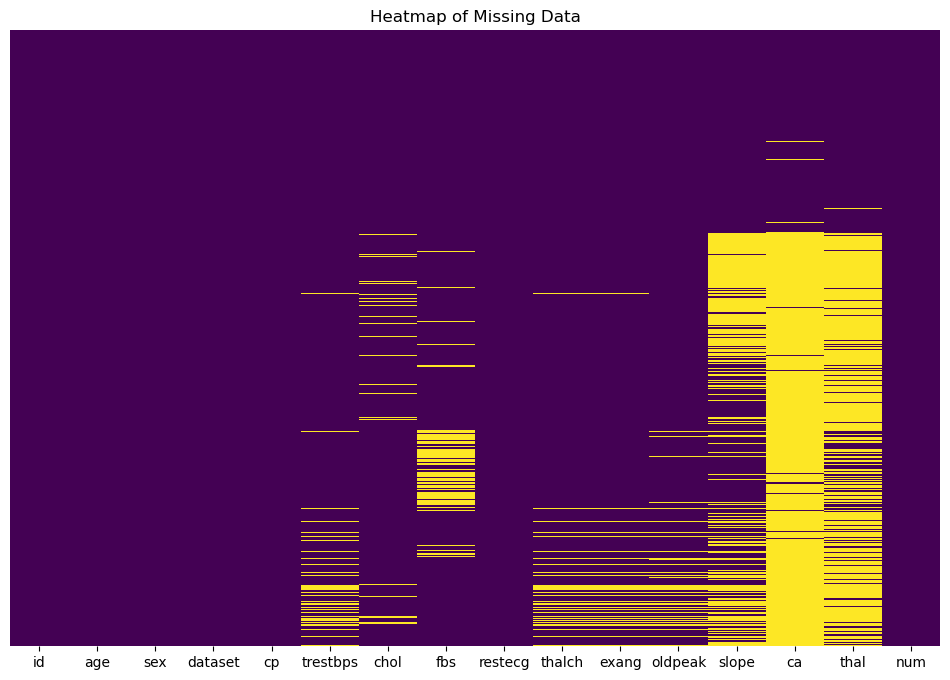

In [2]:
# Plot a heatmap to visualize where data is missing
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Data')
plt.show()

We can see based on this heatmap that there is some data missing expecially when it comes to the ECG assesment. The most predominant data missing is in the ca (number of major vessels) collumn. This might be because some of the universities did not measure this feature of the patient but we cannot be sure at this moment. For now, I am going to check all the data that has no missing values to see if there are some weird values inside. 

In [9]:
import pandas as pd

# Define the path to the dataset
file_path = "heart_disease_uci.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display unique values in the 'sex' column
print("Unique values in the 'sex' column:")
print(df['sex'].unique())

# Display the count of each value in the 'sex' column
print("\nValue counts for 'sex' column:")
print(df['sex'].value_counts())


Unique values in the 'sex' column:
['Male' 'Female']

Value counts for 'sex' column:
sex
Male      726
Female    194
Name: count, dtype: int64


Age looks fine, now let's see dataset.

In [10]:
import pandas as pd

# Define the path to the dataset
file_path = "heart_disease_uci.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display unique values in the 'dataset' column
print("Unique values in the 'dataset' column:")
print(df['dataset'].unique())

# Display the count of each value in the 'dataset' column
print("\nValue counts for 'dataset' column:")
print(df['dataset'].value_counts())

Unique values in the 'dataset' column:
['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']

Value counts for 'dataset' column:
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64


For these one there are 4 distinct values and it looks good, now let's see cp.

In [11]:
import pandas as pd

# Define the path to the dataset
file_path = "heart_disease_uci.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display unique values in the 'cp' column
print("Unique values in the 'cp' column:")
print(df['cp'].unique())

# Display the count of each value in the 'cp' column
print("\nValue counts for 'cp' column:")
print(df['cp'].value_counts())


Unique values in the 'cp' column:
['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']

Value counts for 'cp' column:
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


Chest pain feature has 4 values. I atributed each feature a number based on how severe it is (higher means worse): 

-asymptomatic (1): No chest pain is felt by the patient.

-non-anginal (2): The pain is not in the heart area and it doesn't present angina criterias.

-atypical angina (3): The pain has all the angina criterias, but the pain is not in the heart area. (ex. pain can come from the abdominal area)

-typical angina (4): The pain presents angina criterias and is in the heart area. 

Now let's check the restecg feature.

In [12]:
import pandas as pd

# Define the path to the dataset
file_path = "heart_disease_uci.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display unique values in the 'restecg' column
print("Unique values in the 'restecg' column:")
print(df['restecg'].unique())

# Display the count of each value in the 'restecg' column
print("\nValue counts for 'restecg' column:")
print(df['restecg'].value_counts())

Unique values in the 'restecg' column:
['lv hypertrophy' 'normal' 'st-t abnormality' nan]

Value counts for 'restecg' column:
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64


Restecg feature has 3 different values. I also attributed each feature a number based on severity (higher number means worse)

-normal (1): This means that the ecg looks normal

-lv hypertrophy (2): This means that the left ventricul (the most important chamber of the heart) is overworked and it might over develop compared to other chambers.

-st-t abnormality (3): This means that there are some blood currents created in the heart that are affecting the pace of it.

The features that have no missing data seem to be without any weird data inside. For the moment being, I will not worry about the missing data and I am going to remove all the collumns that have absent data and worry about this in future itterations. I will make now a Correlation Matrix between all the collumns that have no missing data based on the num. 

C:\Users\Bogdi\AppData\Local\Temp\ipykernel_9480\1531890927.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['sex'] = df_selected['sex'].apply(lambda x: 1 if x == 'Male' else 0)
C:\Users\Bogdi\AppData\Local\Temp\ipykernel_9480\1531890927.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['cp'] = df_selected['cp'].map(cp_mapping)
C:\Users\Bogdi\AppData\Local\Temp\ipykernel_9480\1531890927.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

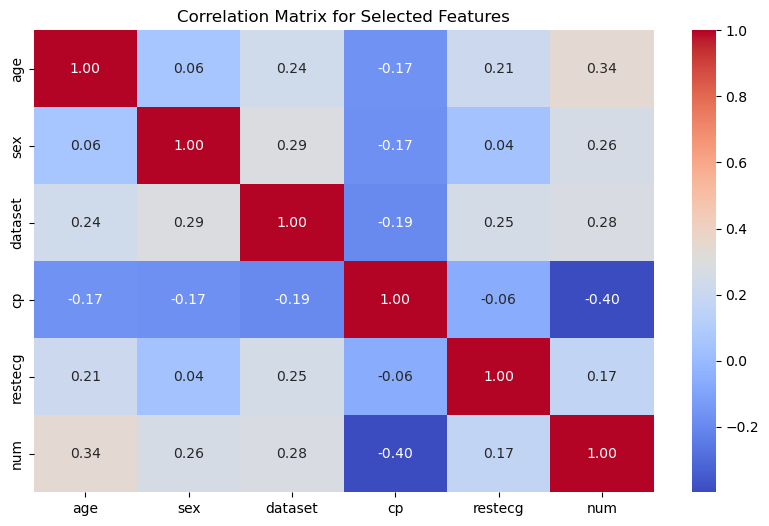

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path to the dataset
file_path = "heart_disease_uci.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Select only the features that have no missing data
selected_features = ['age', 'sex', 'dataset', 'cp', 'restecg', 'num']
df_selected = df[selected_features]

# Convert 'sex' to numeric (1 for Male, 0 for Female)
df_selected['sex'] = df_selected['sex'].apply(lambda x: 1 if x == 'Male' else 0)

# Map 'cp' (chest pain) values based on severity as provided
cp_mapping = {
    'asymptomatic': 1,
    'non-anginal': 2,
    'atypical angina': 3,
    'typical angina': 4
}
df_selected['cp'] = df_selected['cp'].map(cp_mapping)

# Map 'restecg' values based on severity as provided
restecg_mapping = {
    'normal': 1,
    'lv hypertrophy': 2,
    'st-t abnormality': 3
}
df_selected['restecg'] = df_selected['restecg'].map(restecg_mapping)

# Convert 'dataset' to numeric if necessary (assuming it represents different data sources)
df_selected['dataset'] = df_selected['dataset'].astype('category').cat.codes

# Create the correlation matrix
corr_matrix = df_selected.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix for Selected Features")
plt.show()


Based on this Matrix, we can conclude those observations:

1. Age (0.34): There is a moderate positive correlation between age and num. This means that it is likely that as age increseases, the severity of heart disease increseases.

2. Sex (0.26): There is a slight positive correlation between sex and num. This means that men (because they are 1) have a slighty higher chance of having more serious heart problems than women. 

3. Dataset (0.28): There is a small positive correlation between dataset and num. This might be the case because there may be more biased data from an Institute. 

4. CP (-0.40): There is a big negative correlation between cp and num. This means that as the Chest pain is less severe, the severity of heart disease increseases. This looks counter intuitive so I am going to look more into this.

5. Restecg: There is a very slight positive correlation between restecg and num. I am going to take into account this correlation when it comes to modelling. 



Now I am going to dive into why the chest pain is inverse proportionally to the level of heart disease.

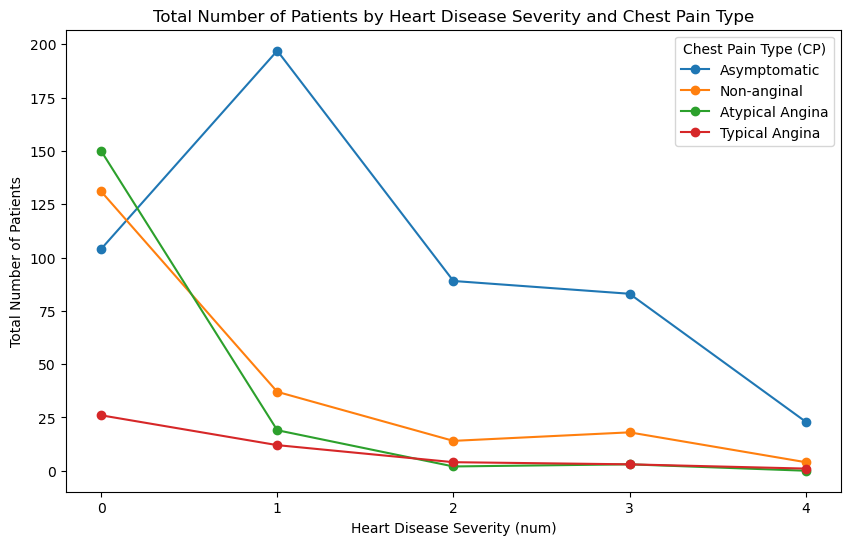

In [2]:
import seaborn as sns

# Define the path to the dataset
file_path = "heart_disease_uci.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Map 'cp' (chest pain) values based on severity as you previously described
cp_mapping = {
    'asymptomatic': 1,
    'non-anginal': 2,
    'atypical angina': 3,
    'typical angina': 4
}
# Reverse mapping for legend labels
cp_labels = {
    1: 'Asymptomatic',
    2: 'Non-anginal',
    3: 'Atypical Angina',
    4: 'Typical Angina'
}
df['cp'] = df['cp'].map(cp_mapping)

# Group data by 'num' and 'cp' and count the total number of patients
df_grouped = df.groupby(['num', 'cp']).size().unstack(fill_value=0)

# Plot the scatter plot
plt.figure(figsize=(10, 6))

# Plotting different lines for each 'cp' value with labels
for cp_type in df_grouped.columns:
    plt.plot(df_grouped.index, df_grouped[cp_type], marker='o', label=cp_labels[cp_type])

# Add labels and title
plt.xlabel('Heart Disease Severity (num)')
plt.ylabel('Total Number of Patients')
plt.title('Total Number of Patients by Heart Disease Severity and Chest Pain Type')

# Set x-axis ticks to show integers only
plt.xticks(ticks=[0, 1, 2, 3, 4])

# Show legend with the chest pain type names
plt.legend(title='Chest Pain Type (CP)')

# Show the plot
plt.show()

We can see a clear bias towords giving the patients with asymptomatic chest pain the level 1 for Heart Disease Severity. This might be the case because the vagueness of the pain is not a strong indicator for what type of chest disease the patient might have, thus harder to diagnose, and at the same time not painful enough to be a severe condition.

I am going to check also the graph based on the age of the patient.

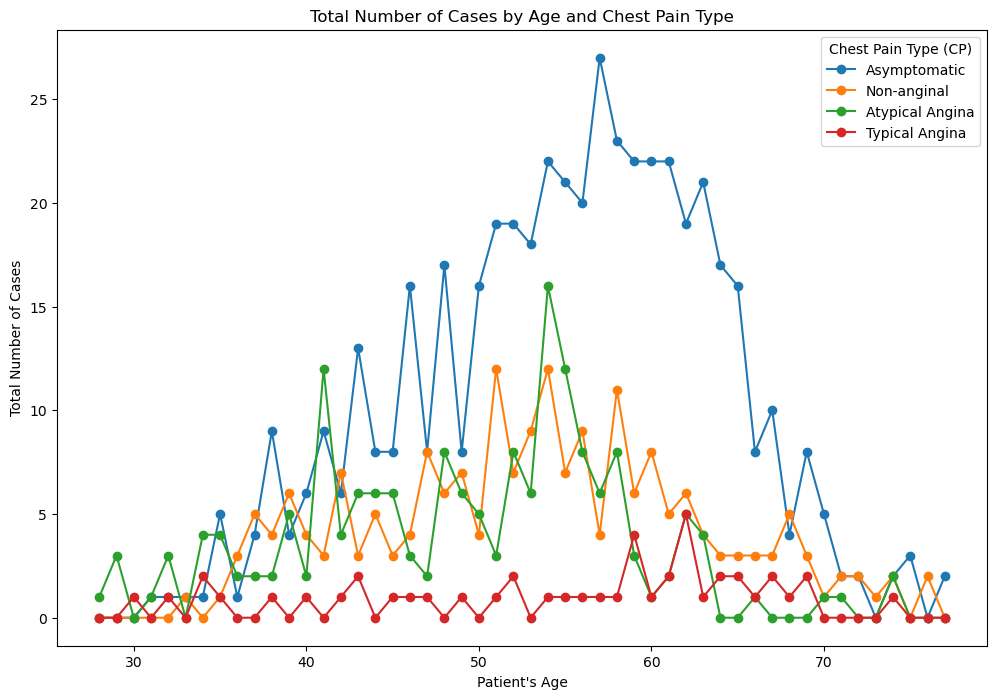

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the dataset
file_path = "heart_disease_uci.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Map 'cp' (chest pain) values based on severity as you previously described
cp_mapping = {
    'asymptomatic': 1,
    'non-anginal': 2,
    'atypical angina': 3,
    'typical angina': 4
}
# Reverse mapping for legend labels
cp_labels = {
    1: 'Asymptomatic',
    2: 'Non-anginal',
    3: 'Atypical Angina',
    4: 'Typical Angina'
}
df['cp'] = df['cp'].map(cp_mapping)

# Group data by 'age' and 'cp' and count the total number of patients
df_grouped = df.groupby(['age', 'cp']).size().unstack(fill_value=0)

# Plot the scatter plot
plt.figure(figsize=(12, 8))

# Plotting different lines for each 'cp' value with labels
for cp_type in df_grouped.columns:
    plt.plot(df_grouped.index, df_grouped[cp_type], marker='o', label=cp_labels[cp_type])

# Add labels and title
plt.xlabel("Patient's Age")
plt.ylabel('Total Number of Cases')
plt.title('Total Number of Cases by Age and Chest Pain Type')

# Show legend with the chest pain type names
plt.legend(title='Chest Pain Type (CP)')

# Show the plot
plt.show()

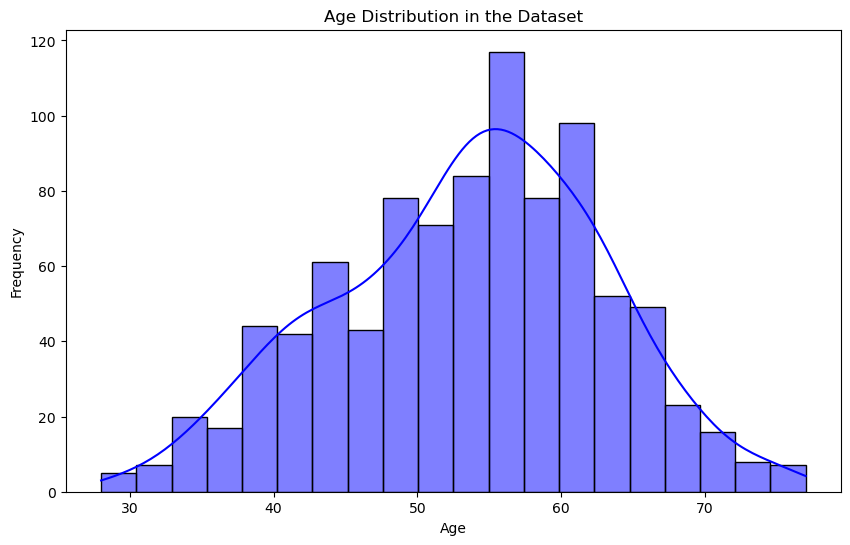

In [3]:
# Create a histogram of the 'age' column
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution in the Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

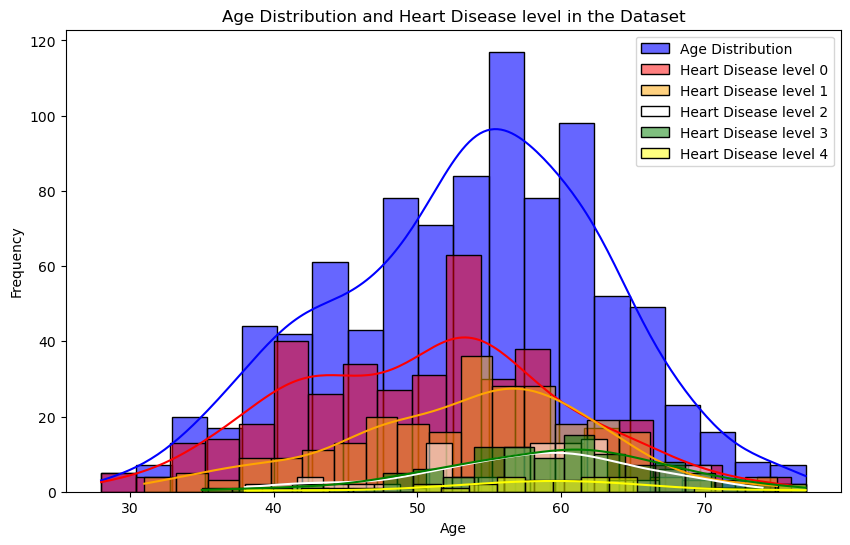

In [11]:
# Create a histogram of the 'age' column with heart attack risk
plt.figure(figsize=(10, 6))

# Plot age distribution (blue)
sns.histplot(df['age'], bins=20, kde=True, color='blue', label='Age Distribution', alpha=0.6)

# Plot heart attack risk for each age (red)
sns.histplot(df[df['num'] == 0]['age'], bins=20, kde=True, color='red', label='Heart Disease level 0', alpha=0.5)

sns.histplot(df[df['num'] == 1]['age'], bins=20, kde=True, color='orange', label='Heart Disease level 1', alpha=0.5)

sns.histplot(df[df['num'] == 2]['age'], bins=20, kde=True, color='white', label='Heart Disease level 2', alpha=0.5)

sns.histplot(df[df['num'] == 3]['age'], bins=20, kde=True, color='green', label='Heart Disease level 3', alpha=0.5)

sns.histplot(df[df['num'] == 4]['age'], bins=20, kde=True, color='yellow', label='Heart Disease level 4', alpha=0.5)

plt.title('Age Distribution and Heart Disease level in the Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Based on those 3 graphs, we can see that the asymptomatic type of chest pain line in the first graph is quite similar to the distribution of age between the patients. At the same time, the other 3 types of chest pain, are not in sync with the data and tend to have a peak when the age is lower. This might be the case because maybe that the survival age when you experience this type of symptoms is lower.


The same cannot be said about the level of Heart Disease Severity. Tt looks like the more severe the disease might be, the older the patient is. This might be that the more people age, they tend to develop more severe diseases.



# Modeling

As we can see, the target value is num, and it comes in 5 levels numbered from 0 to 4. The more severe the disease is, the higher the number. It is clear to me that this is a clasification problem, and I am going to apply Nearest Neighbour for now. 

I am going to start with preprocessing the data, which means that I need to remove all the rows that have missing data, because I am going to worry about the missing data in future iterations. Also, I am going to make all the data numerical.

In [56]:
import pandas as pd

# Define the path to the dataset
file_path = "heart_disease_uci.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Select only the columns that have no missing data (age, sex, dataset, cp, restecg) and the target (num)
selected_columns = ['age', 'sex', 'dataset', 'cp', 'restecg', 'num']
df_cleaned = df[selected_columns]

# Display the cleaned data (first 5 rows)
print("Cleaned Data (First 5 Rows):")
print(df_cleaned.head())

# Map 'sex' to numerical values (1 for Male, 0 for Female)
df_cleaned['sex'] = df_cleaned['sex'].map({'Male': 1, 'Female': 0})

# Map 'cp' (chest pain) values based on severity
cp_mapping = {
    'asymptomatic': 1,
    'non-anginal': 2,
    'atypical angina': 3,
    'typical angina': 4
}
df_cleaned['cp'] = df_cleaned['cp'].map(cp_mapping)

# Map 'restecg' (resting ECG) values based on severity
restecg_mapping = {
    'normal': 1,
    'lv hypertrophy': 2,
    'st-t abnormality': 3
}
df_cleaned['restecg'] = df_cleaned['restecg'].map(restecg_mapping)

# Map 'dataset' (assuming this is categorical and needs encoding)
df_cleaned['dataset'] = df_cleaned['dataset'].astype('category').cat.codes

# Display the first few rows of the updated DataFrame
print(df_cleaned.head())

Cleaned Data (First 5 Rows):
   age     sex    dataset               cp         restecg  num
0   63    Male  Cleveland   typical angina  lv hypertrophy    0
1   67    Male  Cleveland     asymptomatic  lv hypertrophy    2
2   67    Male  Cleveland     asymptomatic  lv hypertrophy    1
3   37    Male  Cleveland      non-anginal          normal    0
4   41  Female  Cleveland  atypical angina  lv hypertrophy    0
   age  sex  dataset  cp  restecg  num
0   63    1        0   4      2.0    0
1   67    1        0   1      2.0    2
2   67    1        0   1      2.0    1
3   37    1        0   2      1.0    0
4   41    0        0   3      2.0    0


C:\Users\Bogdi\AppData\Local\Temp\ipykernel_56812\1374054587.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sex'] = df_cleaned['sex'].map({'Male': 1, 'Female': 0})
C:\Users\Bogdi\AppData\Local\Temp\ipykernel_56812\1374054587.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cp'] = df_cleaned['cp'].map(cp_mapping)
C:\Users\Bogdi\AppData\Local\Temp\ipykernel_56812\1374054587.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

Now that we cleared all the features with missing data and made everything numerical, we are going to apply the KNN model. I am going to put all the features on the ox axis (I know it is multidimensional), and the target value on the oy axis.

In [57]:
# Features (X) and Target (y)
X = df_cleaned.drop('num', axis=1)  
y = df_cleaned['num']  # Target (heart disease severity)

# Display the features and target shape
print("Shape of Features (X):", X.shape)
print("Shape of Target (y):", y.shape)



Shape of Features (X): (920, 5)
Shape of Target (y): (920,)


After this, we need to standardize the data because the values have different variance.

In [58]:
from sklearn.preprocessing import StandardScaler

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the scaled features
print("Scaled Features (First 5 Rows):")
print(X_scaled[:5])


Scaled Features (First 5 Rows):
[[ 1.00738556  0.51693097 -1.09555752  2.4181517   0.5101369 ]
 [ 1.43203377  0.51693097 -1.09555752 -0.80605057  0.5101369 ]
 [ 1.43203377  0.51693097 -1.09555752 -0.80605057  0.5101369 ]
 [-1.75282779  0.51693097 -1.09555752  0.26868352 -0.74874932]
 [-1.32817959 -1.93449426 -1.09555752  1.34341761  0.5101369 ]]


After this, I am going to split the dataset into rain and test sets. The split is going to be 80/20.

In [59]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shape of the split data
print("Training Feature Set Shape:", X_train.shape)
print("Testing Feature Set Shape:", X_test.shape)


Training Feature Set Shape: (736, 5)
Testing Feature Set Shape: (184, 5)


Now we are all set to go for the KNN model. I am going to start with k=5 and see the result.

In [60]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)


ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

It seems like the model doesn't want to run. I am going to check if the sets have any missing data.

In [61]:
# Check for NaN values in X_train and y_train
import numpy as np

print("Missing values in X_train:", np.isnan(X_train).sum())
print("Missing values in y_train:", np.isnan(y_train).sum())


Missing values in X_train: 1
Missing values in y_train: 0


It seems that there is one missing value in the X train. For now I am going to remove the row that has the missing value because one missing row will not affect the model that much.

In [65]:
# Remove rows with missing values
X_train_cleaned = X_train[~np.isnan(X_train).any(axis=1)]


I am going to try to train the model again. 

In [68]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_cleaned, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [735, 736]

I think I figured out the problem. I cleared the row on the x axis that had the missing data, but the row in the y axis is still there therefore not having the same shape, thus the model not working. I am going to also clear the corrsponding row in the y train as well.

In [72]:
import numpy as np

# Find indices of rows with missing values in X_train
missing_indices = np.isnan(X_train).any(axis=1)

# Remove rows with missing values from both X_train and y_train
X_train_cleaned = X_train[~missing_indices]
y_train_cleaned = y_train[~missing_indices]

# Check if the shapes match
print("Shape of X_train_cleaned:", X_train_cleaned.shape)
print("Shape of y_train_cleaned:", y_train_cleaned.shape)


Shape of X_train_cleaned: (735, 5)
Shape of y_train_cleaned: (735,)


Now I am going to train the model with both of the axis cleared. 

In [73]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_cleaned, y_train_cleaned)


KNeighborsClassifier()

Now that the model has been created, I am going to make predictions on the test set. 

In [74]:
# Make predictions on the test data
y_pred = knn.predict(X_test)


ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

I see that there is another error again. I am going to check if there is any missing data in the train set as well.

In [75]:
# Check for NaN values in X_train and y_train
import numpy as np

print("Missing values in X_test:", np.isnan(X_test).sum())
print("Missing values in y_test:", np.isnan(y_test).sum())

Missing values in X_test: 1
Missing values in y_test: 0


I see that there are missing values in the test set as well. I am going to remove them like I did in the train set.

In [76]:
# Remove rows with missing values in X_test and the corresponding rows in y_test
X_test_cleaned = X_test[~np.isnan(X_test).any(axis=1)]
y_test_cleaned = y_test[~np.isnan(X_test).any(axis=1)]


Now, I am going to retry the prediction again.

In [77]:
# Make predictions on the cleaned or imputed test set
y_pred = knn.predict(X_test_cleaned)  # Use X_test_imputed if you imputed the missing values


And Now I am going to evaluate the prediction based on the real results.

In [79]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test_cleaned, y_pred)  # Use y_test_cleaned or y_test_imputed
print("Accuracy:", accuracy)

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_cleaned, y_pred))




Accuracy: 0.5409836065573771
Confusion Matrix:
[[65  9  1  0  0]
 [19 23  5  6  0]
 [ 7  8  5  5  0]
 [ 8 12  0  6  0]
 [ 1  1  1  1  0]]


After the evaluation, we have an accuracy of 0.5409836065573771 which is not ideal but it is a start.

Looking at the Confusion Matrix, we can see that the best accuracy is for when the num is 0. Furthermore, we can see that the model did not predict correctly any of the num 4 Heart Disease Severity. This might be the case because of the small sample of data that we have for those types of diseases and also because the model is not the right one for the problem that I am trying to solve.